In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        break
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-dataset/Unet_dataset/masks_brain_tum/img_160.jpg
/kaggle/input/brain-tumor-dataset/Unet_dataset/images_brain_tum/img_160.jpg


In [2]:
import torch
from torch import nn
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3, padding = 1)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.Relu()
    
    def forward(self, x:torch.Tensor):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        return x

class Encoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        
        
class Decoder(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        

        
class Unet(nn.Module):
     def __init__(self, in_channels, out_channels):
        super().__init__()

## Device agnostic code

In [4]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

/kaggle/input/brain-tumor-dataset/Unet_dataset/masks_brain_tum/img_160.jpg



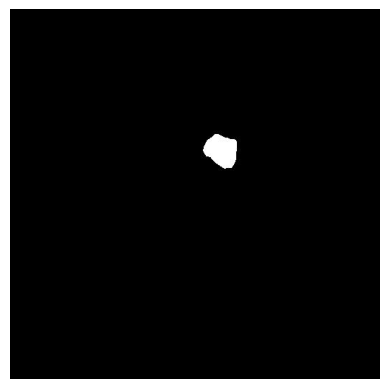

/kaggle/input/brain-tumor-dataset/Unet_dataset/images_brain_tum/img_160.jpg



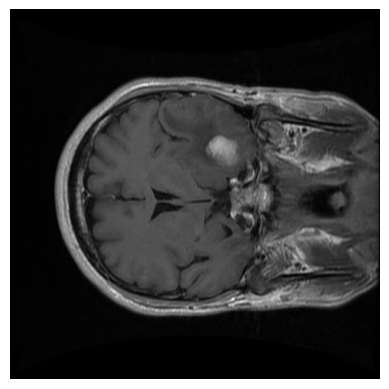

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for img in filenames:
        print(f"{os.path.join(dirname, img)}\n")
        img_array = cv2.imread(os.path.join(dirname,img))  
        plt.imshow(img_array)
        plt.axis('off')
        plt.show()
        break
    

### Creating traing image array

In [6]:
categories = ['images_brain_tum', 'masks_brain_tum']
dirname = '/kaggle/input/brain-tumor-dataset/Unet_dataset/'
images = []
masks = []

for category in categories:  
    path = os.path.join(dirname,category)  
    for img in tqdm(os.listdir(path)): 
        try:
            if category == 'images_brain_tum':
                image = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                images.append(image)
                
            else:
                mask = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                masks.append(mask)
                
        except Exception as e: 
            pass
#         break


100%|██████████| 705/705 [00:02<00:00, 245.72it/s]


In [7]:
torch.manual_seed(42)

images_np = np.array(images)
print(images_np.shape)
images_np = np.squeeze(images_np)
images_np = np.expand_dims(images_np, axis=1)
# images_np = np.transpose(images_np, (2, 0, 1))
images_np = images_np.astype(np.float32)
tensor_images = torch.from_numpy(images_np.astype(np.float32))

masks_np = np.array(masks)
print(masks_np.shape)
masks_np = np.expand_dims(masks_np, axis=1)
masks_np = masks_np.astype(np.float32)
tensor_masks = torch.from_numpy(masks_np.astype(np.float32))

print(f"image: {tensor_images.shape}")
print(f"mask: {tensor_masks.shape}")

(705, 512, 512)
(705, 512, 512)
image: torch.Size([705, 1, 512, 512])
mask: torch.Size([705, 1, 512, 512])


(-0.5, 511.5, 511.5, -0.5)

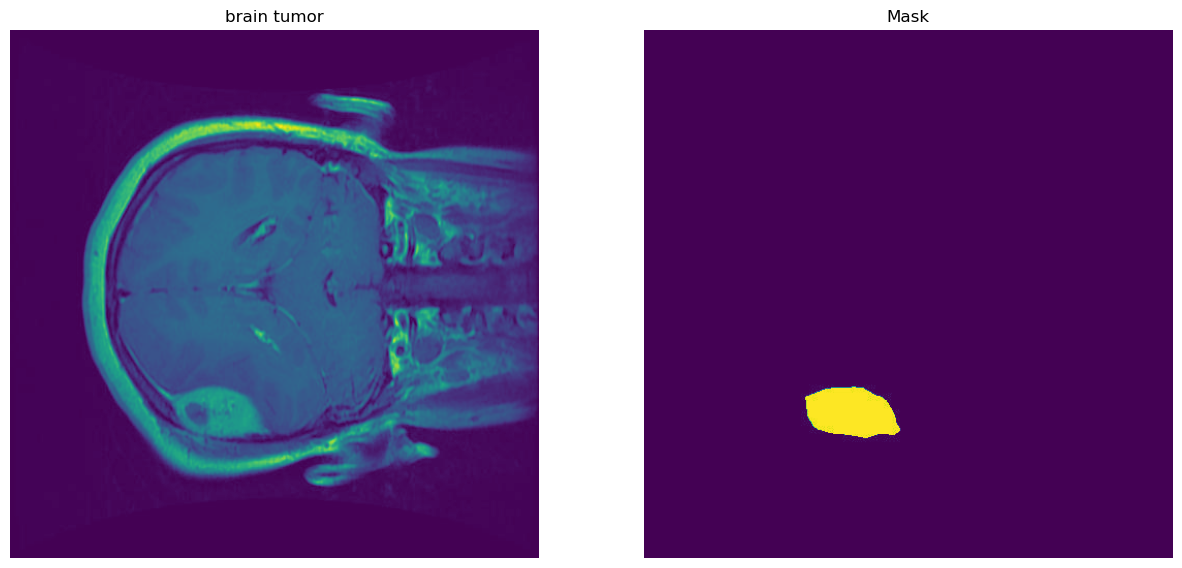

In [8]:
f, (ax1, ax2) = plt.subplots(1,2)
f.set_figheight(15)
f.set_figwidth(15)
ax1.imshow(tensor_images[1].squeeze())
ax1.set_title("brain tumor")
ax1.axis(False)
ax2.imshow(tensor_masks[1].squeeze())
ax2.set_title("Mask")
ax2.axis(False)

### Unet Architecture